In [30]:
import numpy as np #mengimport modul numpy sebagai np
from numpy import sin, cos, tan, log, exp, pi, sqrt #mengimport operasi-operasi pada numpy untuk komputasi
from tabulate import tabulate #mengimport modul tabulate untuk membuat tabel 

formula=input('Masukkan formula fungsi: ') #menginput fungsi yang ditanyakan
imax=int(input('Tentukan banyak iterasi maksimal: ')) #menginput jumlah iterasi maksimal metode
d=int(input('Masukkan digit terakhir NPM anda: ')) #menginput angka terakhir NPM sebagai d untuk menentukan b
b=max(d,10-d) #mencari nilai maksimal b untuk dimasukkan ke fungsi
print('Nilai b : {0}'.format(b)) #memunculkan nilai b yang telah dicari


def f(x): #mendefinisikan fungsi f(x)
  return eval(formula) #untuk memproses input menjadi f(x)

def df(x, h=10**-12): #mendefinisikan turunan f(x) untuk metode newton
  return (f(x+h)-f(x))/h #menurunkan fungsi f(x)

def Bisection(lower, upper, tolerance): #mendefinisikan metode bisection dengan diketahui batas atas, bawah, dan toleransinya
    table=[['Iterasi', 'Hasil Aproksimasi']] #membuat header tabel berisi iterasi dan hasil aproksimasi
    iterasi=[]  #array kosong untuk diisi hasil nanti

    if f(lower)*f(upper)<0: #menggunakan  if else untuk menentukan apakah syarat ineterval pada bisection terpenuhi (interval harus berbeda tanda)
      p0=lower #inisiasi p0 sebagai batas bawah
      p=(lower+upper)/2 #rumus mencari p (titik tengah interval) di metode bisection
        
      if f(p)==0:
        return p #p adalah akar dari fungsi tsb
      elif f(p)*f(lower)>0:
        lower=p  #mengubah batas bawah menjadi p
      elif f(p)*f(lower)<0:
        upper=p  #mengubah batas atas menjadi p
            
      abs_error=abs(p0-p) #mutlak dari interval awal dikurang p untuk menjadi absolut error
      p0=p #mengubah nilai p0 menjadi p
      i=1  #inisiasi nilai i awal
      iterasi.append(p) #menambah elemen baru dan row baru dalam tabel

      while abs_error>=tolerance:  #untuk menjalankan iterasi selama absolut errornya >= toleransi
        i=i+1  #agar nomor iterasi terus berjalan selama while
        if i>imax:   #jika iterasi sudah sesuai kemauan, iterasi akan berhenti
          break  #krn di dalam while
        p=(lower+upper)/2

        if f(p)==0:
          break  #krn di dalem while
        elif f(p)*f(lower)>0:  #jika memenuhi, maka interval akan berganti menjadi [p,upper]
          lower=p
        elif f(p)*f(lower)<0:  #jika memenuhi, maka interval akan berganti menjadi [lower,p]
          upper=p
                
        abs_error=abs(p0-p)
        p0=p
        iterasi.append(p)

      for i, j in enumerate(iterasi, 1): #mengubah list hasil menjadi tabel
        table.append([i,j])
      print(tabulate(table, headers='firstrow', tablefmt='pretty'))  #memunculkan tabel

      return p

    else:
      if f(lower)*f(upper)>0:  #batas atas dan bawah mempunyai tanda yang sama
        return "Metode gagal mengaproksimasi. Silahkan ubah batas atas atau batas bawah"
      else:
        if f(lower)==0:
          return lower
        else:  #f(upper)==0
          return upper

def FixedPoint(p0, tolerance): #mendefinisikan metode fixed point dengan diketahui p0 (batas bawah) dan toleransinya
  table=[['Iterasi','Aproksimasi']] #membuat header tabel berisi iterasi dan hasil aproksimasi
  iterasi=[]  #array kosong untuk diisi hasil nanti

  p=f(p0)  #mengubah nilai p
  abs_error=abs(p-p0) #mutlak dari interval awal dikurang p untuk menjadi absolut error
  p0=p0
  i=1  #inisiasi nilai i awal
  iterasi.append(p)  #menambah elemen baru dan row baru dalam tabel

  while abs_error >= tolerance:  #untuk menjalankan iterasi selama absolut errornya >= toleransi
    i=i+1   #agar nomor iterasi terus berjalan selama while
    if i>imax:   #jika iterasi sudah sesuai kemauan, iterasi akan berhenti
      break
    p=f(p0)
    abs_error=abs(p-p0)
    p0=p
    iterasi.append(p)

  for i,j in enumerate(iterasi,1):   #mengubah list hasil menjadi tabel
    table.append([i,j])

  print(tabulate(table, headers='firstrow', tablefmt='pretty'))  #memunculkan tabel
  return p

def Secant(p0,p1,tolerance):  #mendefinisikan metode secant dengan diketahui batas bawah, batas atas, dan toleransinya
  table=[['Iterasi','Aproksimasi']] #membuat header tabel berisi iterasi dan hasil aproksimasi
  iterasi=[]   #array kosong untuk diisi hasil nanti

  p=p1-(f(p1)*(p1-p0))/(f(p1)-f(p0))  #rumus mencari p pada metode secant
  abs_error=abs(p-p1)  #mutlak dari interval awal dikurang p untuk menjadi interval toleransi
  p0=p1  #mengubah nilai p0
  p1=p   #mengubah nilai p1
  i=1   #inisiasi nilai awal i
  iterasi.append(p)  #menambah elemen baru dan row baru dalam tabel

  while abs_error >= tolerance:  #untuk menjalankan iterasi selama absolut errornya >= toleransi
    i=i+1  #agar nomor iterasi terus berjalan selama while
    if i>imax:   #jika iterasi sudah sesuai kemauan, iterasi akan berhenti
      break
    p=p1-(f(p1)*(p1-p0))/(f(p1)-f(p0))
    abs_error=abs(p-p1)
    p0=p1
    p1=p
    iterasi.append(p)

  for i,j in enumerate(iterasi,1):   #mengubah list hasil menjadi tabel
    table.append([i,j])

  print(tabulate(table, headers='firstrow', tablefmt='pretty'))   #memunculkan tabel
  return p

def Newton(p0, tolerance):   #mendefinisikan metode newton dengan diketahui batas bawah dan toleransinya
  table=[['Iterasi','Aproksimasi']]   #membuat header tabel berisi iterasi dan hasil aproksimasi
  iterasi=[]   #array kosong untuk diisi hasil nanti

  p=p0-(f(p0)/df(p0))   #rumus mencari p pada metode newton
  abs_error = abs(p-p0)  #mutlak dari interval awal dikurang p untuk menjadi absolut error
  p0=p  #mengubah nilai p0
  i=1   #inisiasi nilai awal i
  iterasi.append(p)   #menambah elemen baru dan row baru dalam tabel

  while abs_error>=tolerance:   #untuk menjalankan iterasi selama absolut errornya >= toleransi
    i=i+1    #agar nomor iterasi terus berjalan selama while
    if i>imax:  #jika iterasi sudah sesuai kemauan, iterasi akan berhenti
      break
    p=p0-(f(p0)/df(p0))  
    abs_error=abs(p-p0)   
    p0=p
    iterasi.append(p)

  for i,j in enumerate(iterasi,1):   #mengubah list hasil menjadi tabel
    table.append([i,j])
  print(tabulate(table, headers='firstrow', tablefmt='pretty'))  #memunculkan tabel
  return p

def FalsePosition(p0, p1, tolerance):  #mendefinisikan metode false position dengan diketahui batas bawah, batas atas, dan toleransinya
  table=[['Iterasi','Aproksimasi']]  #membuat header tabel berisi iterasi dan hasil aproksimasi
  iterasi=[]   #array kosong untuk diisi hasil nanti

  if f(p0)*f(p1)<0:   #menggunakan  if else untuk menentukan apakah syarat ineterval pada false position terpenuhi (interval harus berbeda tanda)
    p=p1-((f(p1)*(p1-p0))/(f(p1)-f(p0)))  #rumus mencari p pada metode false position

    if f(p)==0: 
      return p  #mengembalikan nilai p karena p adalah akar dari fungsi tsb
    elif f(p)*f(p0)>0:
      p0=p  #mengubah batas bawah menjadi p
    elif f(p)*f(p0)<0:
      p1=p  #mengubah batas atas menjadi p

    abs_error=abs(p1-p)
    p0=p1  #mengubah p0 menjadi p1
    p1=p   #mengubah p1 menjadi p
    i=1
    iterasi.append(p)

    while abs_error>=tolerance:   #untuk menjalankan iterasi selama absolut errornya >= toleransi
      i=i+1   #agar nomor iterasi terus berjalan selama while
      if i>imax:   #jika iterasi sudah sesuai kemauan, iterasi akan berhenti
        break
      p=p1-((f(p1)*(p1-p0))/(f(p1)-f(p0)))
                 
      abs_error=abs(p1-p)
      p0=p1
      p1=p
      iterasi.append(p)

    for i,j in enumerate(iterasi,1):  #mengubah list hasil menjadi tabel
      table.append([i,j])

    print(tabulate(table, headers='firstrow', tablefmt='pretty'))  #memunculkan tabel
    return p

  else:  #jika f(p0)*f(p1)>0
    print('a dan b tidak menghimpit akar')

def Pilih_Metode():  #mendefinisikan pilih metode 
  print('Pilih metode yang digunakan (angka): ') 

Pilih_Metode()  #memanggil definisi pilih metode
metode = int(input('1.Bisection 2.FixedPoint 3.Secant 4.Newton 5.FalsePosition : '))  #meminta input metode yang dipilih berupa angka lalu disimpan jadi variabel metode

if metode == 1:  #jika dipilih metode 1, program masuk ke syarat-syarat metode Bisection
  low_bound=eval(input("Masukkan batas bawah interval: "))  #meminta input interval bawah
  up_bound=eval(input("Masukkan batas atas interval: "))   #meminta input interval atas
  tolerance=eval(input("Masukkan toleransi aproksimasi: "))  #meminta input toleransi aproksimasi
  akar_bis = Bisection(low_bound, up_bound, tolerance)  #memanggil bisection dengan input2 yang sudah diberikan
  try:
    print("Akar persamaan f(x) = {0} adalah x = {1:.7f}".format(formula, akar_bis))  #menampilkan hasil aproksimasi
  except ValueError:   #handling adanya value error
    print(akar_bis)
elif metode == 2:  #jika dipilih metode 2, program masuk ke syarat-syarat metode Fixed Point
  starting_point = eval(input('Masukkan titik awal iterasi: '))  #meminta input interval bawah
  tolerance = eval(input('Masukkan batas toleransi aproksimasi: '))  #meminta input toleransi aproksimasi
  fixed_point = FixedPoint(starting_point, tolerance)  #memanggil fixed point dengan input2 yang sudah diberikan
  print('Fixed Point unik dari f(x)={0} adalah x={1:.7f}'.format(formula, fixed_point))  #menampilkan hasil aproksimasi
elif metode == 3:  #jika dipilih metode 3, program masuk ke syarat-syarat metode Secant
  starting_point1 = eval(input("Masukkan titik awal pertama: ")) #meminta input interval bawah
  starting_point2 = eval(input("Masukkan titik awal kedua: "))  #meminta input interval atas
  tolerance = eval(input("Masukkan toleransi aproksimasi: "))   #meminta input toleransi aproksimasi
  akar_sec = Secant(starting_point1, starting_point2, tolerance)  #memanggil secant dengan input2 yang sudah diberikan
  print("Akar dari persamaan f(x)={0} adalah x={1:.7f}".format(formula, akar_sec))  #menampilkan hasil aproksimasi
elif metode == 4:   #jika dipilih metode 4, program masuk ke syarat-syarat metode Newton
  starting_point = eval(input("Masukkan titik awal iterasi: "))  #meminta input interval bawah
  tolerance = eval(input("Masukkan toleransi aproksimasi: "))  #meminta input toleransi aproksimasi
  akar_newton = Newton(starting_point, tolerance)   #memanggil newton dengan input2 yang sudah diberikan
  print("Akar dari persamaan f(x)={0} adalah x={1:.7f}".format(formula, akar_newton)) #menampilkan hasil aproksimasi
elif metode == 5:   ##jika dipilih metode 1, program masuk ke syarat-syarat metode Regula Falsi
  low_bound=eval(input("Masukkan batas bawah interval: "))  #meminta input interval bawah
  up_bound=eval(input("Masukkan batas atas interval: "))  #meminta input interval atas
  tolerance=eval(input("Masukkan toleransi aproksimasi: "))   #meminta input toleransi aproksimasi
  akar_RFalsi = FalsePosition(low_bound, up_bound, tolerance) #memanggil false position dengan input2 yang sudah diberikan
  print("Akar persamaan {0} = 0 adalah x = {1:.7f}".format(formula, akar_RFalsi))  #menampilkan hasil aproksimasi
else:  #jika dipilih angka yang tidak ada pada pilihan
  print('Silahkan input angka yang berada di pilihan')

print('Terima kasih sudah menggunakan program ini!')  #memunculkan salam penutup

Masukkan formula fungsi: log(x**2+2)
Tentukan banyak iterasi maksimal: 10
Masukkan digit terakhir NPM anda: 0
Nilai b : 10
Pilih metode yang digunakan (angka): 
1.Bisection 2.FixedPoint 3.Secant 4.Newton 5.FalsePosition : 2
Masukkan titik awal iterasi: -2*pi
Masukkan batas toleransi aproksimasi: 10**-4
+---------+--------------------+
| Iterasi |    Aproksimasi     |
+---------+--------------------+
|    1    | 3.725173234233403  |
|    2    | 3.725173234233403  |
|    3    | 2.764866206793224  |
|    4    | 2.2663862640585593 |
|    5    | 1.965223398630413  |
|    6    | 1.7685084140422782 |
|    7    | 1.634642006008127  |
|    8    | 1.5415989080876855 |
|    9    | 1.4762555316789108 |
|   10    | 1.4301510410758869 |
+---------+--------------------+
Fixed Point unik dari f(x)=log(x**2+2) adalah x=1.4301510
Terima kasih sudah menggunakan program ini!


Program ini adalah program untuk mencari nilai akar dari persamaan non-linier dengan 5 metode (Bisection, Fixed Position, Secant, Newton, dan Regula Falsi)

Idenya adalah menginput fungsi, variabel-variabel awal yang dibutuhkan, dan metode yang akan digunakan. Lalu, akan dijalankan program sesuai metode yang dipilih. Sehingga di dapat hasil akhirnya adalah akar dari persamaan tersebut.

Algoritma:
1. Mengimport modul numpy dan tabulate sesuai kebutuhan
2. Simpan variabel-variabel yang diinginkan (formula dengan meminta input fungsi, imax dengan meminta input jumlah iterasi berjenis integer, d dengan meminta input integer digit terakhir NPM, dan b dengan menghitung nilai maksimal antara d sampai10-d)
3. Print nilai b yang telah dihitung
4. Definisikan f(x) agar input formula bisa menjadi fungsi dan definisikan df sebagai turunan f(x)
5. Definisikan semua metode-metode yang akan dipakai dengan syarat-syaratnya
6. Di dalam metode buat tabel dengan headers banyaknya iterasi yang akan dilakukan dan hasil aproksimasinya
7. Minta input untuk metode mana yang akan dipilih User
8. Program akan berjalan sesuai metode yang dipilih dengan meminta input syarat-syarat yang dibutuhkan seperti btas atas, batas bawah, toleransi, dsb sesuai kebutuhan metode tsb
9. Program memanggil metode yang sudah didefinisikan di atas
10. print akar persamaan dan tabel sebagai hasil akhir program
11. Jika error/program tidak mengeluarkan hasil, pada tahap 10 mungkin terdapat kesalahan input dari user atau user memilih metode yang tidak ada di pilihan

Contoh input dan output program

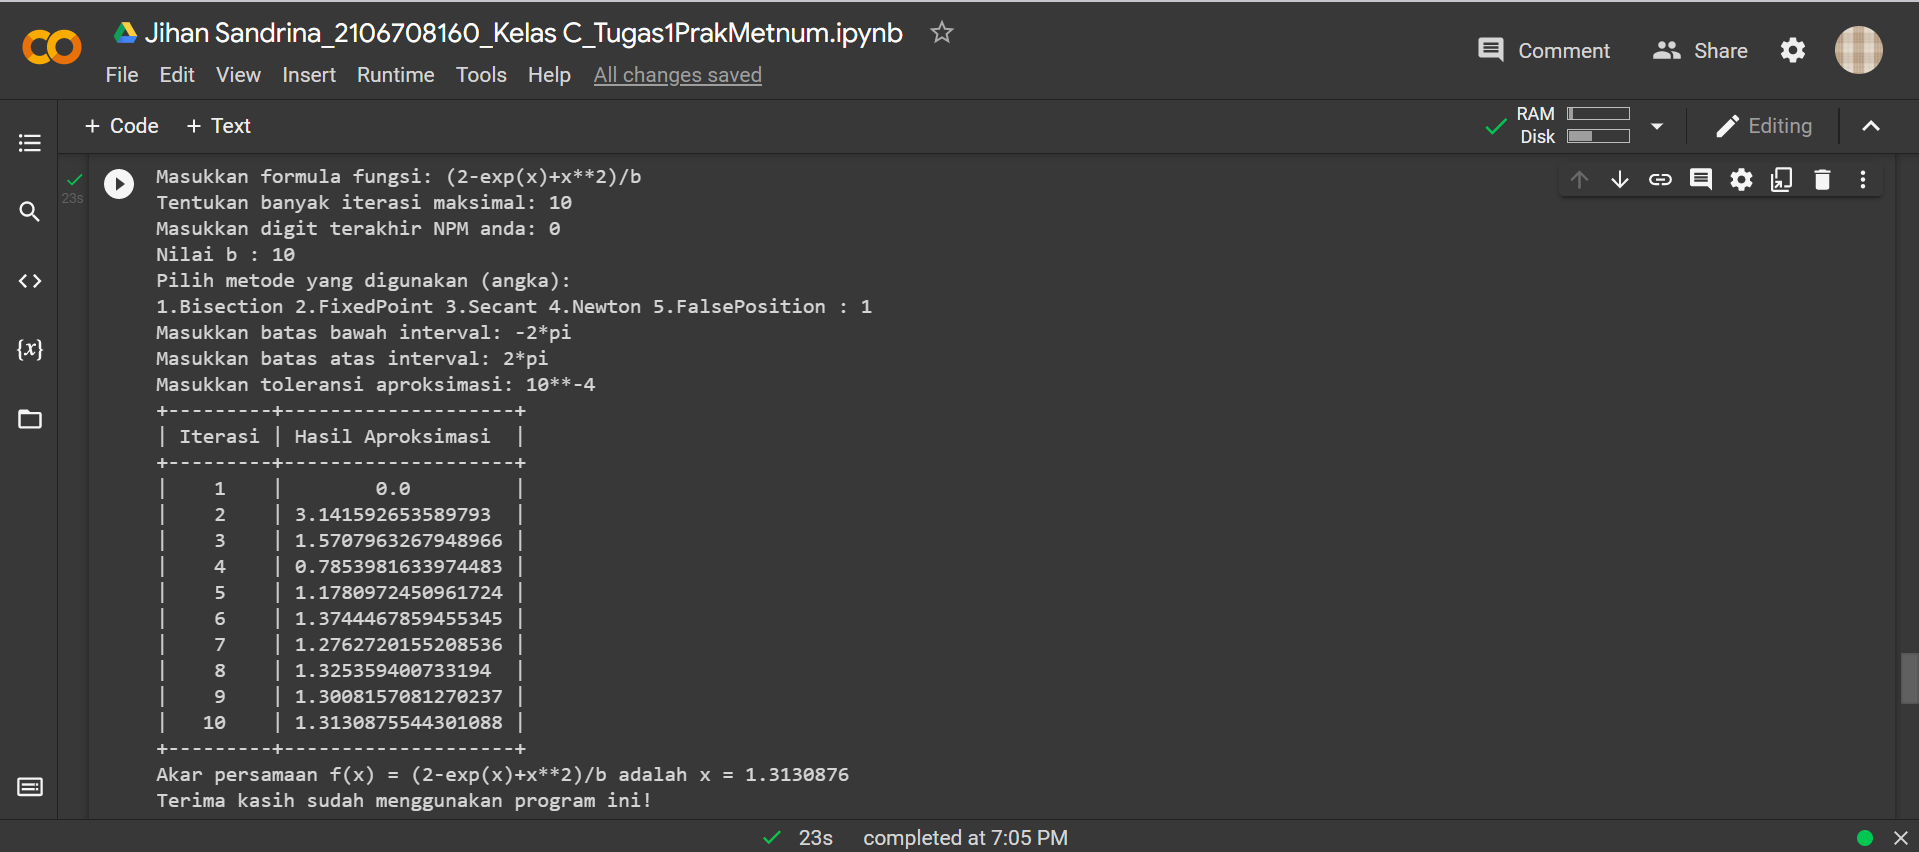